In [304]:
import pandas as pd
import numpy as np

# Data cleaning

In [310]:
df_countries = pd.read_csv('df_countries_2.csv', sep=';')

In [311]:
df_countries

,alpha_2_code,country
0,AF,Afghanistan
1,AL,Albania
2,DZ,Algeria
3,AS,American Samoa
4,AD,Andorra
...,...,...
244,EH,Western Sahara
245,YE,Yemen
246,ZM,Zambia
247,ZW,Zimbabwe


In [312]:
experience_level_map = {
    'EN': '1. Entry_level',
    'MI': '2. Mid_Intermediate_level',
    'SE': '3. Senior_level',
    'EX': '4. Executive_level'
}

employment_type_map = {
    'CT': 'Contractual',
    'FL': 'Freelancer',
    'FT': 'Full_Time',
    'PT': 'Part_Time'
}


In [313]:
df_salaries = pd.read_csv('ds_salaries.csv')

In [314]:
df_salaries.shape

(3755, 11)

In [309]:
df_salaries.experience_level.value_counts()

SE    2516
MI     805
EN     320
EX     114
Name: experience_level, dtype: int64

import random



column_list = ['experience_level', 'employment_type', 'job_title', 'remote_ratio', 'company_size']

for c in column_list:
    for i in list(df_salaries[c].value_counts().keys()):
        mask = (df_salaries[c] == i)
        Q1 = int(df_salaries[mask]['salary_in_usd'].quantile(0.25))
        Q3 = int(df_salaries[mask]['salary_in_usd'].quantile(0.75))
        IQR = Q3 - Q1
        print('Límite superior: ' + str(Q3 + 1 * IQR))
        print('Límite inferior: ' + str(Q1 - 1 * IQR))

        # random integer from 0 to 9
        num1 = random.randint(0, 9)
        print(num1)
        df_salaries['salary_in_usd'] = df_salaries.apply(lambda row:  random.randint(Q1, Q3) if ((row[c] == i) & (row['salary_in_usd'] > (Q3 + 1 * IQR))) else row['salary_in_usd']  , axis = 1)
        df_salaries['salary_in_usd'] = df_salaries.apply(lambda row:  random.randint(Q1, Q3) if ((row[c] == i) & (row['salary_in_usd'] < (Q1 - 1 * IQR))) else row['salary_in_usd']  , axis = 1)



In [315]:


df_salaries.loc[df_salaries['company_size'] == 'M', 'salary_in_usd'] = df_salaries.salary_in_usd - 10000

df_salaries.loc[df_salaries['job_title'] == 'Machine Learning Engineer', 'salary_in_usd'] = df_salaries.salary_in_usd + 10000

df_salaries.loc[df_salaries['work_year'] == 2020, 'salary_in_usd'] = df_salaries.salary_in_usd - 5000
df_salaries.loc[df_salaries['work_year'] == 2022, 'salary_in_usd'] = df_salaries.salary_in_usd + 5000
df_salaries.loc[df_salaries['work_year'] == 2023, 'salary_in_usd'] = df_salaries.salary_in_usd + 8000

df_salaries.loc[df_salaries['experience_level'] == 'EN', 'salary_in_usd'] = df_salaries.salary_in_usd - 8000
df_salaries.loc[df_salaries['experience_level'] == 'MI', 'salary_in_usd'] = df_salaries.salary_in_usd - 2000
df_salaries.loc[df_salaries['experience_level'] == 'SE', 'salary_in_usd'] = df_salaries.salary_in_usd + 2000
df_salaries.loc[df_salaries['experience_level'] == 'EX', 'salary_in_usd'] = df_salaries.salary_in_usd + 8000

df_salaries = df_salaries[df_salaries['salary_in_usd']>= 3000]

In [316]:
df_salaries.salary_in_usd.describe()

count      3730.000000
mean     137261.831367
std       63958.688950
min        3000.000000
25%       93000.000000
50%      134700.000000
75%      176000.000000
max      433834.000000
Name: salary_in_usd, dtype: float64

In [317]:
df_salaries.shape

(3730, 11)

In [286]:
df_salaries.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [287]:


df_salaries = df_salaries.merge(df_countries[['alpha_2_code','country']],how = 'left', left_on = 'employee_residence', right_on = 'alpha_2_code', suffixes=('','_employee_residence'))
df_salaries = df_salaries.merge(df_countries[['alpha_2_code','country']],how = 'left', left_on = 'company_location', right_on = 'alpha_2_code', suffixes=('','_company_location'))
df_salaries = df_salaries.drop(columns=['alpha_2_code','alpha_2_code_company_location','employee_residence','company_location'])

df_salaries = df_salaries.rename(columns= {'country':'country_employee_residence'})

df_salaries['experience_level'] = df_salaries['experience_level'].apply(lambda x: experience_level_map[x])
df_salaries['employment_type'] = df_salaries['employment_type'].apply(lambda x: employment_type_map[x])


In [288]:
df_salaries

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,remote_ratio,company_size,country_employee_residence,country_company_location
0,2023,3. Senior_level,Full_Time,Principal Data Scientist,80000,EUR,95847,100,L,Spain,Spain
1,2023,2. Mid_Intermediate_level,Contractual,ML Engineer,30000,USD,36000,100,S,United States of America,United States of America
2,2023,2. Mid_Intermediate_level,Contractual,ML Engineer,25500,USD,31500,100,S,United States of America,United States of America
3,2023,3. Senior_level,Full_Time,Data Scientist,175000,USD,175000,100,M,Canada,Canada
4,2023,3. Senior_level,Full_Time,Data Scientist,120000,USD,120000,100,M,Canada,Canada
...,...,...,...,...,...,...,...,...,...,...,...
3725,2020,3. Senior_level,Full_Time,Data Scientist,412000,USD,409000,100,L,United States of America,United States of America
3726,2021,2. Mid_Intermediate_level,Full_Time,Principal Data Scientist,151000,USD,149000,100,L,United States of America,United States of America
3727,2020,1. Entry_level,Full_Time,Data Scientist,105000,USD,92000,100,S,United States of America,United States of America
3728,2020,1. Entry_level,Contractual,Business Data Analyst,100000,USD,87000,100,L,United States of America,United States of America


In [289]:
df_salaries.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'remote_ratio',
       'company_size', 'country_employee_residence',
       'country_company_location'],
      dtype='object')

In [290]:
col = ['job_title', 'salary_currency', 'country_employee_residence', 'country_company_location']

In [291]:
for c in col:
    # Top values in column
    li_top = df_salaries[c].value_counts()[:5].index
    df_salaries.loc[~df_salaries[c].isin(li_top), c] = 'Others'


In [292]:
df_salaries

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,remote_ratio,company_size,country_employee_residence,country_company_location
0,2023,3. Senior_level,Full_Time,Others,80000,EUR,95847,100,L,Spain,Spain
1,2023,2. Mid_Intermediate_level,Contractual,Others,30000,USD,36000,100,S,United States of America,United States of America
2,2023,2. Mid_Intermediate_level,Contractual,Others,25500,USD,31500,100,S,United States of America,United States of America
3,2023,3. Senior_level,Full_Time,Data Scientist,175000,USD,175000,100,M,Canada,Canada
4,2023,3. Senior_level,Full_Time,Data Scientist,120000,USD,120000,100,M,Canada,Canada
...,...,...,...,...,...,...,...,...,...,...,...
3725,2020,3. Senior_level,Full_Time,Data Scientist,412000,USD,409000,100,L,United States of America,United States of America
3726,2021,2. Mid_Intermediate_level,Full_Time,Others,151000,USD,149000,100,L,United States of America,United States of America
3727,2020,1. Entry_level,Full_Time,Data Scientist,105000,USD,92000,100,S,United States of America,United States of America
3728,2020,1. Entry_level,Contractual,Others,100000,USD,87000,100,L,United States of America,United States of America


In [293]:
df_salaries.salary_currency.value_counts()

USD       3215
EUR        233
GBP        161
INR         50
Others      46
CAD         25
Name: salary_currency, dtype: int64

# Outliers cleaning

In [294]:
df_salaries['salary_in_usd'].describe()

count      3730.000000
mean     137261.831367
std       63958.688950
min        3000.000000
25%       93000.000000
50%      134700.000000
75%      176000.000000
max      433834.000000
Name: salary_in_usd, dtype: float64

<Axes: >

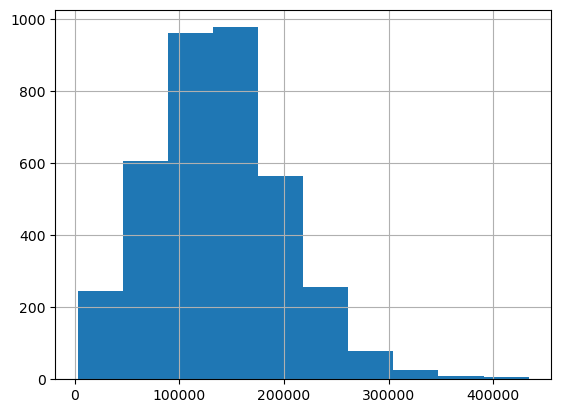

In [295]:
df_salaries['salary_in_usd'].hist()

In [296]:
Q1 = df_salaries['salary_in_usd'].quantile(0.25)
Q3 = df_salaries['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1
print('Límite superior: ' + str(Q3 + 2 * IQR))
df_salaries['salary_in_usd'] = np.where((df_salaries['salary_in_usd'] < (Q3 + 2 * IQR)), df_salaries['salary_in_usd'], Q3 + 2 * IQR)

Límite superior: 342000.0


<Axes: >

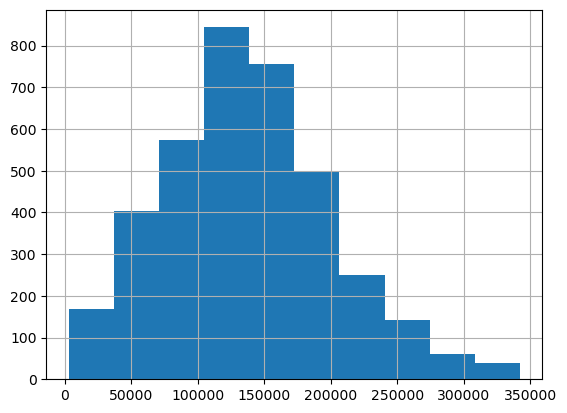

In [297]:
df_salaries['salary_in_usd'].hist()

In [298]:
df_salaries

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,remote_ratio,company_size,country_employee_residence,country_company_location
0,2023,3. Senior_level,Full_Time,Others,80000,EUR,95847.0,100,L,Spain,Spain
1,2023,2. Mid_Intermediate_level,Contractual,Others,30000,USD,36000.0,100,S,United States of America,United States of America
2,2023,2. Mid_Intermediate_level,Contractual,Others,25500,USD,31500.0,100,S,United States of America,United States of America
3,2023,3. Senior_level,Full_Time,Data Scientist,175000,USD,175000.0,100,M,Canada,Canada
4,2023,3. Senior_level,Full_Time,Data Scientist,120000,USD,120000.0,100,M,Canada,Canada
...,...,...,...,...,...,...,...,...,...,...,...
3725,2020,3. Senior_level,Full_Time,Data Scientist,412000,USD,342000.0,100,L,United States of America,United States of America
3726,2021,2. Mid_Intermediate_level,Full_Time,Others,151000,USD,149000.0,100,L,United States of America,United States of America
3727,2020,1. Entry_level,Full_Time,Data Scientist,105000,USD,92000.0,100,S,United States of America,United States of America
3728,2020,1. Entry_level,Contractual,Others,100000,USD,87000.0,100,L,United States of America,United States of America


In [300]:
col_encode = ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'company_size', 'country_employee_residence', 'country_company_location']
df_salaries = pd.get_dummies(df_salaries, columns=col_encode, drop_first=True)
df_salaries.drop(columns='salary',inplace=True)
df_salaries.head()

,work_year,salary_in_usd,remote_ratio,experience_level_2. Mid_Intermediate_level,experience_level_3. Senior_level,experience_level_4. Executive_level,employment_type_Freelancer,employment_type_Full_Time,employment_type_Part_Time,job_title_Data Analyst,...,country_employee_residence_India,country_employee_residence_Others,country_employee_residence_Spain,country_employee_residence_United Kingdom of Great Britain and Northern Ireland,country_employee_residence_United States of America,country_company_location_Germany,country_company_location_Others,country_company_location_Spain,country_company_location_United Kingdom of Great Britain and Northern Ireland,country_company_location_United States of America
0,2023,95847.0,100,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1,2023,36000.0,100,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2023,31500.0,100,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,2023,175000.0,100,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2023,120000.0,100,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [301]:
df_salaries.to_csv('model_db.csv', index = False)